In [1]:
import pytesseract
import json
import cv2
import matplotlib.pyplot as plt
import re
import numpy as np
from PIL import Image

See back of receipt for your chance
ta win $1000

ID #: 7L2TSWIM25F

Walmart >/<.

Save money. Live better.

( 701 ) 223 - 3066
MANAGER TIM MORRIS
2717 ROCK TSLAND PL
BISMARCK ND 58504
ST# 01534 OP# 009048 TE# 48 TR# 04405

6 WING PLATE 020108870998 3.98 P
ASST 27 063099656595 4.88 X
CUTIE CAR 063099656644 12.88 X

TOTAL 23.19
DEBIT TEND 23.19
CHANGE DUE 0.00

SUBTOTAL 21.74
| TAX 1 6.500 % 1.15
TAX 4 7.500 & 0.30

EF] OFBIT PAY FROM PRIMARY
23.19 JOTAL PURCHASE
US DEBIT xxxK xxxx xxxx 2696 1 0)

REF # 731700494718
NETWORK 10. O08! APPR CODE 936886

US DEBIT

AID AQOGO0GO980840

TC 58B77239DA5B3B44
*NO STGNATURE REQUIRED
TERMINAL # SCO11090

11/13/17 12:34:04
# TTEMS SOLD 3
TC# 2188 7274 6444 1567 3762

TENA

Low Prices You Can Irust. Every Day.
11/13/17 12:34:11
; Store receipts on your phone. Walmart P
< ay.




(-0.5, 597.5, 1599.5, -0.5)

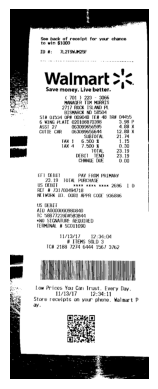

In [2]:
# Example 1

# Image path
image_path = "./kaggle/images/7.jpg"

# Open the image and apply image preprocessing
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, image = cv2.threshold(image, 130, 255, cv2.THRESH_BINARY)

# Apply OCR
extracted_text = pytesseract.image_to_string(image, lang="eng")

# Print
print(extracted_text)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
plt.axis("off")

In [3]:
# Extract "Date" data from each image

# Number of images
NUM_IMAGES = 20
dates = []

for i in range(NUM_IMAGES):
    # Image path
    image_path = f"./kaggle/images/{i}.jpg"

    # Open the image and apply image preprocessing
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply OCR
    extracted_text = pytesseract.image_to_string(image, lang="eng")
    
    # Date Matching Regex (ex: 26/01/2018, 01-02-2024)
    date_match = re.search(r"(\d{1,2}[/\-]\d{1,2}[/\-]\d{2,4})", extracted_text)
    date = date_match.group(0) if date_match else None

    # Add dates to the list
    dates.append(date)

print(dates)

[None, '06-28-2014', '10/18/20', None, '12/08/15', '9/15/2020', '26/01/2016', '11/13/17', None, '09/08/14', None, None, None, None, '05/04/17', '07/22/16', '11/13/17', '01/18/17', '10/31/21', None]


In [4]:
# Check how many of them are successful

failure = dates.count(None)
successful = len(dates) - failure

print(f"Successful: {successful}, Failure: {failure}")

Successful: 12, Failure: 8


In [6]:
import invoiceocr

# Extract "Date" data from each image

# Number of images
NUM_IMAGES = 20
dates = []

for i in range(NUM_IMAGES):
    # Image path
    image_path = f"./kaggle/images/{i}.jpg"
    dates.append(invoiceocr.extract_date(invoiceocr.read(image_path)))
print(dates)

[2025/03/13 21:46:19] ppocr DEBUG: dt_boxes num : 36, elapsed : 0.43915772438049316
[2025/03/13 21:46:19] ppocr DEBUG: cls num  : 36, elapsed : 0.10414862632751465
[2025/03/13 21:46:23] ppocr DEBUG: rec_res num  : 36, elapsed : 4.623661279678345
[2025/03/13 21:46:24] ppocr DEBUG: dt_boxes num : 58, elapsed : 0.3732938766479492
[2025/03/13 21:46:24] ppocr DEBUG: cls num  : 58, elapsed : 0.12624454498291016
[2025/03/13 21:46:27] ppocr DEBUG: rec_res num  : 58, elapsed : 3.4423577785491943
[2025/03/13 21:46:28] ppocr DEBUG: dt_boxes num : 51, elapsed : 0.20038723945617676
[2025/03/13 21:46:28] ppocr DEBUG: cls num  : 51, elapsed : 0.12336850166320801
[2025/03/13 21:46:30] ppocr DEBUG: rec_res num  : 51, elapsed : 2.3069303035736084
[2025/03/13 21:46:30] ppocr DEBUG: dt_boxes num : 120, elapsed : 0.22351670265197754
[2025/03/13 21:46:30] ppocr DEBUG: cls num  : 120, elapsed : 0.12553119659423828
[2025/03/13 21:46:34] ppocr DEBUG: rec_res num  : 120, elapsed : 3.704486131668091
[2025/03/13 

In [7]:
# Check how many of them are successful

failure = dates.count(None)
successful = len(dates) - failure

print(f"Successful: {successful}, Failure: {failure}")

Successful: 17, Failure: 3
